In [1]:
import sys, os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
sys.path.append(os.path.abspath(os.path.join(os.curdir, '..')))

In [2]:
from configs import unet_convnextv2_hard_aug_config as config
from models.unet_convnextv2 import Unet
from datasets.depth_dataset import DepthDataset
from utils.train_utils import train_model

/home/v.lomtev/audio_ml/python_CIL/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/v.lomtev/audio_ml/python_CIL/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/v.lomtev/audio_ml/python_CIL/lib/python3.12/site-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [3]:
torch.manual_seed(42)
train_full_dataset = DepthDataset(
    data_dir=os.path.join(config.dataset_path, 'train/train'),
    list_file=os.path.join(config.dataset_path, 'train_list.txt'), 
    transform=config.transform_train,
    target_transform=config.target_transform,
    has_gt=True,
    use_albumentations=True)

In [4]:
dataloader = DataLoader(
    train_full_dataset, 
    batch_size=config.val_bs, 
    shuffle=False, 
    num_workers=config.num_workers, 
    pin_memory=True
)

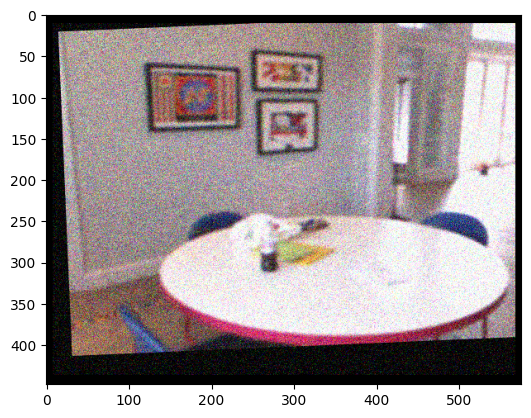

tensor([[-1.0000, -1.0000, -1.0000,  ...,  6.9412,  6.9412,  6.9412],
        [-1.0000, -1.0000, -1.0000,  ...,  6.9412,  6.9412,  6.9412],
        [-1.0000, -1.0000, -1.0000,  ...,  6.9412,  6.9412,  6.9412],
        ...,
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]])


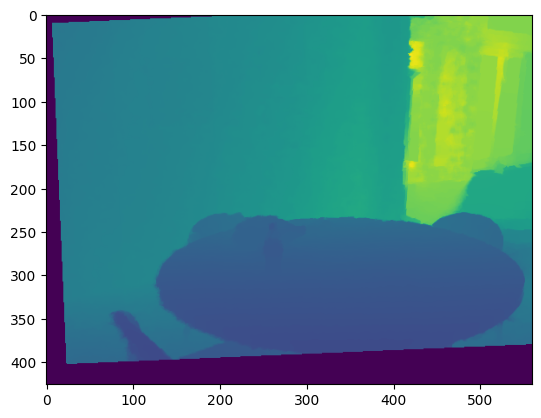

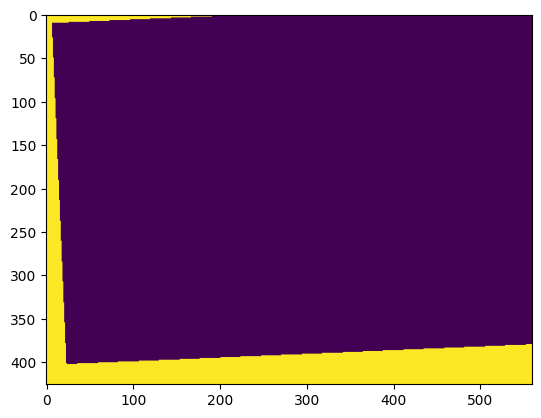

In [7]:
import matplotlib.pyplot as plt
for i, o, f in dataloader:
    plt.imshow(i[0].permute(1, 2, 0))
    plt.show()
    plt.clf()
    print(min(o[0]))
    plt.imshow(o[0].permute(1, 2, 0))
    plt.show()
    plt.clf()
    plt.imshow(o[0].permute(1, 2, 0) == -1.0)
    plt.show()
    break